C:\Users\trist\AppData\Local\Temp\ipykernel_20148\3418951071.py:20: RuntimeWarning: divide by zero encountered in divide
  p3H = (1 - (1 - p)**3) / (((1 - p)**3) * (1 - (1 - p)))
C:\Users\trist\AppData\Local\Temp\ipykernel_20148\3418951071.py:20: RuntimeWarning: invalid value encountered in divide
  p3H = (1 - (1 - p)**3) / (((1 - p)**3) * (1 - (1 - p)))
C:\Users\trist\AppData\Local\Temp\ipykernel_20148\3418951071.py:23: RuntimeWarning: divide by zero encountered in divide
  p4T = (1 - p**4) / ((p**4) * (1 - p))
C:\Users\trist\AppData\Local\Temp\ipykernel_20148\3418951071.py:23: RuntimeWarning: invalid value encountered in divide
  p4T = (1 - p**4) / ((p**4) * (1 - p))


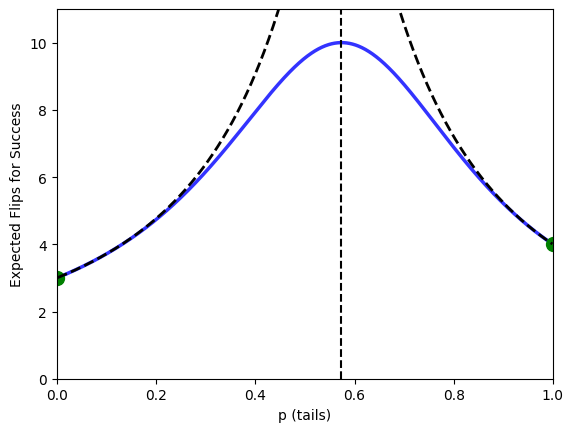

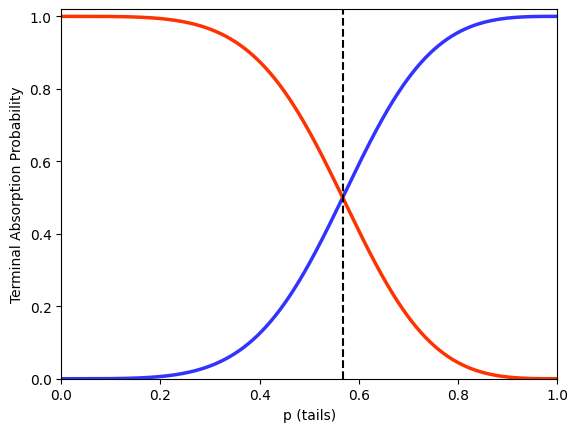

In [2]:
# Tristan Ursell
# MFHTs and Landing Probabilities for the unfair, multi-sequence binomial graph
# May 2024
#

import numpy as np
import matplotlib.pyplot as plt

# Values of p to sample
p = np.arange(0, 1.001, 0.001)

# Calculated tau's from the tutorial
denom = 1 - 2*p + p**2 + 2*p**4 - p**5

tau41 = (3 + p**2 - 2*p**3 + p**4) / denom
tau51 = (2 + p + p**2 + p**3 - p**4) / denom
tauS = 1 + p*tau41 + (1 - p)*tau51

# 3H probability
p3H = (1 - (1 - p)**3) / (((1 - p)**3) * (1 - (1 - p)))

# 4T probability
p4T = (1 - p**4) / ((p**4) * (1 - p))

# Plot of MFHTs
plt.figure()
plt.plot(p, tauS, linewidth=2.5, color=[0.2, 0.2, 1])
plt.plot([p[0], p[-1]], [tauS[0], tauS[-1]], 'g.', markersize=20)
plt.plot(p, p3H, 'k--', linewidth=2)
plt.plot(p, p4T, 'k--', linewidth=2)
plt.axvline(x=0.5735, color='k', linestyle='--')
plt.box(True)
plt.xlabel('p (tails)')
plt.ylabel('Expected Flips for Success')
plt.ylim([0, 11])
plt.xlim([0, 1])
plt.savefig(f'expected_flips_for_success.svg', format='svg')
plt.show()

# Calculate landing probabilities
p_a1 = np.zeros(len(p))

for i in range(len(p)):
    P = np.array([
        [1, 0, 0, 0, 0, 0, 0],
        [p[i], 0, 0, 0, 1 - p[i], 0, 0],
        [0, p[i], 0, 0, 1 - p[i], 0, 0],
        [0, 0, p[i], 0, 1 - p[i], 0, 0],
        [0, 0, 0, p[i], 0, 1 - p[i], 0],
        [0, 0, 0, p[i], 0, 0, 1 - p[i]],
        [0, 0, 0, 0, 0, 0, 1]
    ])
    
    Pinf = np.linalg.matrix_power(P, 10000)
    p_a1[i] = p[i] * Pinf[3, 0] + (1 - p[i]) * Pinf[4, 0]

# Plot of landing probabilities
plt.figure()
plt.plot(p, p_a1, linewidth=2.5, color=[0.2, 0.2, 1])
plt.plot(p, 1 - p_a1, linewidth=2.5, color=[1, 0.2, 0])
plt.axvline(x=0.567, color='k', linestyle='--')
plt.box(True)
plt.xlabel('p (tails)')
plt.ylabel('Terminal Absorption Probability')
plt.ylim([0, 1.02])
plt.xlim([0, 1])
plt.savefig(f'terminal_absorption_probability.svg', format='svg')
plt.show()
